In [1179]:
import pandas as pd
import numpy as np

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

In [1180]:
data = pd.read_csv("../Data_files/2011Q1.csv")

In [1181]:
data['HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR']

0       N
1       N
2       N
3       N
4       N
       ..
1660    N
1661    N
1662    N
1663    N
1664    N
Name: HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR, Length: 1665, dtype: object

In [1182]:
data.columns

Index(['LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'SERVICER', 'ORIG_RATE',
       'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'ORIG_DATE',
       'FIRST_PAY', 'LOAN_AGE', 'REM_MONTHS', 'ADJ_REM_MONTHS', 'MATR_DT',
       'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C', 'FIRST_FLAG',
       'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT', 'STATE', 'MSA', 'ZIP',
       'MI_PCT', 'PRODUCT', 'PPMT_FLG', 'IO', 'DLQ_STATUS', 'PMT_HISTORY',
       'MOD_FLAG', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_UPB', 'TOT_SCHD_PRNCPL',
       'LAST_PAID_INSTALLMENT_DATE', 'FORECLOSURE_DATE', 'DISPOSITION_DATE',
       'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
       'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
       'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 'NET_SALES_PROCEEDS',
       'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS',
       'OTHER_FORECLOSURE_PROCEEDS', 'NON_INTEREST_BEARING_UPB',
       'PRINCIPAL_FORGIVENESS_AMOUNT',

In [1183]:
data['OLTV']

0       79
1       80
2       80
3       80
4       73
        ..
1660    80
1661    70
1662    82
1663    80
1664    75
Name: OLTV, Length: 1665, dtype: int64

In [1184]:
OLTC_type = data['OLTV'].map(type) 

In [1185]:
OLTC_type[1]

int

In [1186]:
OLTC_type[OLTC_type != OLTC_type[1]]

Series([], Name: OLTV, dtype: object)

In [1187]:
data = pd.read_csv("../Data_files/2017Q1.csv")

all_quarter = [ '2017Q2', '2017Q3', '2017Q4']

for Quarter in all_quarter:
    data2 = pd.read_csv("../Data_files/"+ Quarter +".csv")
    data = pd.concat([data, data2])

In [1188]:
#df['Period']

# Training and testing

In [1189]:
df = pd.read_csv("../Data_files/2014Q1.csv")
df['Period'] = '2014Q1'
df = df[0:0]

In [1190]:
df.to_csv('base.csv')

In [1191]:
data = pd.read_csv("base.csv")

years = list(map(str, range(2011, 2018)))
quarters = [ 'Q1', 'Q2', 'Q3', 'Q4']
for year in years:
    for quarter in quarters:
        data2 = pd.read_csv("../Data_files/"+ year + quarter +".csv")
        data2['Period'] = year + quarter
        data = pd.concat([data, data2])
        
data.reset_index(inplace = True)

In [1192]:
data['Period']

0        2011Q1
1        2011Q1
2        2011Q1
3        2011Q1
4        2011Q1
          ...  
25549    2017Q4
25550    2017Q4
25551    2017Q4
25552    2017Q4
25553    2017Q4
Name: Period, Length: 25554, dtype: object

In [1193]:
data.groupby(['Period'])['Period'].count()

Period
2011Q1    1665
2011Q2    1165
2011Q3    1047
2011Q4    1185
2012Q1    1271
2012Q2    1049
2012Q3     992
2012Q4    1038
2013Q1     942
2013Q2     996
2013Q3    1226
2013Q4    1130
2014Q1     687
2014Q2     799
2014Q3     986
2014Q4     950
2015Q1     838
2015Q2     762
2015Q3     797
2015Q4     743
2016Q1     595
2016Q2     649
2016Q3     758
2016Q4     674
2017Q1     566
2017Q2     633
2017Q3     744
2017Q4     667
Name: Period, dtype: int64

In [1194]:
#there are many columns which have turned to be null columns after filtering.
print(data.shape)
current_size = data.shape[0]
all_null_columns = []

All_columns = data.columns
for column in All_columns:
    print(column, len(data[column].unique()))
    nulls = data[column].isnull().sum()
    if nulls==current_size:
        all_null_columns.append(column)
all_null_columns

(25554, 71)
index 1665
Unnamed: 0 1
LOAN_ID 25554
ACT_PERIOD 142
CHANNEL 3
SELLER 105
SERVICER 1
ORIG_RATE 301
CURR_RATE 143
ORIG_UPB 544
CURRENT_UPB 1
ORIG_TERM 28
ORIG_DATE 93
FIRST_PAY 93
LOAN_AGE 1
REM_MONTHS 1
ADJ_REM_MONTHS 1
MATR_DT 1
OLTV 86
OCLTV 94
NUM_BO 4
DTI 54
CSCORE_B 231
CSCORE_C 212
FIRST_FLAG 3
PURPOSE 3
PROP 5
NO_UNITS 4
OCC_STAT 3
STATE 54
MSA 395
ZIP 872
MI_PCT 13
PRODUCT 1
PPMT_FLG 1
IO 1
DLQ_STATUS 92
PMT_HISTORY 1
MOD_FLAG 3
Zero_Bal_Code 4
ZB_DTE 142
LAST_UPB 25501
TOT_SCHD_PRNCPL 54
LAST_PAID_INSTALLMENT_DATE 146
FORECLOSURE_DATE 143
DISPOSITION_DATE 142
FORECLOSURE_COSTS 22763
PROPERTY_PRESERVATION_AND_REPAIR_COSTS 13408
ASSET_RECOVERY_COSTS 2140
MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS 19324
ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY 18655
NET_SALES_PROCEEDS 22309
CREDIT_ENHANCEMENT_PROCEEDS 7630
REPURCHASES_MAKE_WHOLE_PROCEEDS 296
OTHER_FORECLOSURE_PROCEEDS 10902
NON_INTEREST_BEARING_UPB 397
PRINCIPAL_FORGIVENESS_AMOUNT 2
MI_TYPE 3
SERV_IND 1
HOMEREADY_PROGRAM

['Unnamed: 0',
 'SERVICER',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'PMT_HISTORY',
 'SERV_IND']

In [1195]:
data.drop(all_null_columns, axis=1, inplace = True)

In [1196]:
data

,index,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,...,RELOCATION_MORTGAGE_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB,Period,PROPERTY_INSPECTION_WAIVER_INDICATOR
0,0,102211410611,42023,R,"Wells Fargo Bank, N.A.",4.250,4.250,150000.0,0.0,180,...,N,N,7.0,N,N,7,NaN,NaN,2011Q1,NaN
1,1,102788180928,22018,R,"Wells Fargo Bank, N.A.",5.750,NaN,73000.0,0.0,360,...,N,N,NaN,N,N,NaN,NaN,NaN,2011Q1,NaN
2,2,102792918958,72021,R,"JPMorgan Chase Bank, National Association",5.375,5.375,38000.0,0.0,360,...,N,N,7.0,N,N,7,NaN,NaN,2011Q1,NaN
3,3,102977852704,32013,C,Other,5.000,NaN,92000.0,0.0,360,...,N,N,NaN,N,Y,NaN,NaN,NaN,2011Q1,NaN
4,4,103101496236,112015,R,Other,4.500,NaN,85000.0,0.0,180,...,N,N,NaN,N,N,NaN,NaN,NaN,2011Q1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25549,662,995051434481,102021,R,Other,4.125,4.125,150000.0,0.0,360,...,N,N,7.0,N,N,7,NaN,NaN,2017Q4,A
25550,663,995555108801,32020,R,"Wells Fargo Bank, N.A.",4.625,NaN,100000.0,0.0,360,...,N,N,NaN,N,N,NaN,NaN,NaN,2017Q4,A
25551,664,995755646990,92020,R,Other,4.125,4.125,59000.0,0.0,360,...,N,N,7.0,N,N,7,NaN,NaN,2017Q4,A
25552,665,996967690678,52019,C,U.S. Bank N.A.,4.875,NaN,105000.0,0.0,360,...,N,N,NaN,N,N,NaN,NaN,NaN,2017Q4,A


Loss/Loss-given-defalut calculation

In [1197]:
ICdata = data[['DISPOSITION_DATE','ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE','CURR_RATE', 'ORIG_RATE','LAST_UPB', 'NON_INTEREST_BEARING_UPB']]

ICdata.isnull().sum()

DISPOSITION_DATE               1651
ZB_DTE                            0
LAST_PAID_INSTALLMENT_DATE       33
CURR_RATE                     18870
ORIG_RATE                         0
LAST_UPB                          0
NON_INTEREST_BEARING_UPB      24125
dtype: int64

In [1198]:
# the columns CURR_RATE and NON_INTEREST_BEARING_UPB have high null value

#The NON_INTEREST_BEARING_UPB can be made zero for Nan value
#Substitute CURR_RATE with Origination_rate
#Substituting Disposition_date with Zero_balance_effective_date
data['NON_INTEREST_BEARING_UPB'] = data['NON_INTEREST_BEARING_UPB'].fillna(0)
data['CURR_RATE'] = data['CURR_RATE'].fillna(data['ORIG_RATE'])
data['DISPOSITION_DATE'] = data['DISPOSITION_DATE'].fillna(data['ZB_DTE'])

In [1199]:
# removing all rows which don't have values for atleast 1 column
data = data.dropna(subset = ['DISPOSITION_DATE','LAST_PAID_INSTALLMENT_DATE','CURR_RATE','LAST_UPB', 'NON_INTEREST_BEARING_UPB'])

In [1200]:
data['LAST_PAID_INSTALLMENT_DATE'] = data['LAST_PAID_INSTALLMENT_DATE'].astype('Int64').astype(str)
data['DISPOSITION_DATE'] = data['DISPOSITION_DATE'].astype('Int64').astype(str)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\3652237799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LAST_PAID_INSTALLMENT_DATE'] = data['LAST_PAID_INSTALLMENT_DATE'].astype('Int64').astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\3652237799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISPOSITION_DATE'] = data['DISPOSITION_DATE'].astype('Int64').astype(str)


In [1201]:
data[['DISPOSITION_DATE','LAST_PAID_INSTALLMENT_DATE','CURR_RATE','LAST_UPB', 'NON_INTEREST_BEARING_UPB']]

,DISPOSITION_DATE,LAST_PAID_INSTALLMENT_DATE,CURR_RATE,LAST_UPB,NON_INTEREST_BEARING_UPB
0,42023,92022,4.250,1306.25,0.00
1,22018,42017,5.750,65851.32,0.00
2,72021,92020,5.375,38271.03,0.00
3,112013,42012,5.000,90409.72,0.00
4,122016,112014,4.500,65226.36,0.00
...,...,...,...,...,...
25549,102021,72019,4.125,151906.23,14985.22
25550,32020,52019,4.625,97329.06,0.00
25551,32020,112018,4.125,56396.83,0.00
25552,72020,92017,4.875,104760.00,0.00


In [1202]:
data['INT_COST'] =  (data['DISPOSITION_DATE'].str[-4:].astype(float) * 12 + \
                                     data['DISPOSITION_DATE'].str[:-4].astype(float) - \
                                     data['LAST_PAID_INSTALLMENT_DATE'].str[-4:].astype(float) * 12 - \
                                     data['LAST_PAID_INSTALLMENT_DATE'].str[:-4].astype(float)) * \
                                      (((data['CURR_RATE'].astype(float) / 100) - 0.0035) / 12) * \
                                     (data['LAST_UPB'] - data['NON_INTEREST_BEARING_UPB'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\2541202032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INT_COST'] =  (data['DISPOSITION_DATE'].str[-4:].astype(float) * 12 + \


In [1203]:
#columns needed for LOSS calculation
#'INT_COST',
Ldata  = data[['LAST_UPB', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 'ASSET_RECOVERY_COSTS', 
               'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
    'PRINCIPAL_FORGIVENESS_AMOUNT',  'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 'Zero_Bal_Code']]

Ldata.isnull().sum()

LAST_UPB                                          0
FORECLOSURE_COSTS                              2065
PROPERTY_PRESERVATION_AND_REPAIR_COSTS         2070
ASSET_RECOVERY_COSTS                           2070
MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS     2069
ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY          2072
PRINCIPAL_FORGIVENESS_AMOUNT                  23974
NET_SALES_PROCEEDS                             2069
CREDIT_ENHANCEMENT_PROCEEDS                    2073
OTHER_FORECLOSURE_PROCEEDS                     2070
Zero_Bal_Code                                     0
dtype: int64

In [1204]:
Ldata #[Ldata['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'].notnull()]

,LAST_UPB,FORECLOSURE_COSTS,PROPERTY_PRESERVATION_AND_REPAIR_COSTS,ASSET_RECOVERY_COSTS,MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS,ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY,PRINCIPAL_FORGIVENESS_AMOUNT,NET_SALES_PROCEEDS,CREDIT_ENHANCEMENT_PROCEEDS,OTHER_FORECLOSURE_PROCEEDS,Zero_Bal_Code
0,1306.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,65851.32,5865.38,710.00,0.0,1638.00,1362.92,NaN,74162.97,0.00,1624.21,2.0
2,38271.03,7334.44,0.00,0.0,6734.00,4184.92,0.0,40672.41,0.00,3114.93,15.0
3,90409.72,2794.99,8251.38,0.0,0.00,0.00,NaN,27753.51,0.00,0.00,9.0
4,65226.36,9089.45,32333.76,0.0,797.82,3123.39,NaN,110581.08,0.00,0.00,9.0
...,...,...,...,...,...,...,...,...,...,...,...
25549,151906.23,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9.0
25550,97329.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
25551,56396.83,7222.84,0.00,0.0,-606.54,1839.04,NaN,35733.41,19602.43,20.09,2.0
25552,104760.00,8761.49,31909.37,0.0,3862.50,1085.80,NaN,115600.70,24256.33,25.00,9.0


In [1205]:
# the principal forgiveness amount has high number of null values,
# if it is null it can be replaced with 0,
# in general all the values in the costs if not present can be replaced by 0

data['PRINCIPAL_FORGIVENESS_AMOUNT'] = data['PRINCIPAL_FORGIVENESS_AMOUNT'].fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\4154019460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PRINCIPAL_FORGIVENESS_AMOUNT'] = data['PRINCIPAL_FORGIVENESS_AMOUNT'].fillna(0)


In [1206]:
# Converting the null values in all the following columns to zero

data['FORECLOSURE_COSTS'].fillna(0, inplace=True)
data['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'].fillna(0, inplace=True)
data['ASSET_RECOVERY_COSTS'].fillna(0, inplace=True)
data['MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS'].fillna(0, inplace=True)
data['ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY'].fillna(0, inplace=True)
data['PRINCIPAL_FORGIVENESS_AMOUNT'].fillna(0, inplace=True)
data['INT_COST'].fillna(0, inplace=True)
data['NET_SALES_PROCEEDS'].fillna(0, inplace=True)
data['CREDIT_ENHANCEMENT_PROCEEDS'].fillna(0, inplace=True)
data['OTHER_FORECLOSURE_PROCEEDS'].fillna(0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\323050928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FORECLOSURE_COSTS'].fillna(0, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\323050928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'].fillna(0, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\323050928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [1207]:
data['LOSS'] = (data['LAST_UPB'] + \
               data['FORECLOSURE_COSTS'] + \
               data['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'] + \
               data['ASSET_RECOVERY_COSTS'] + \
               data['MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS'] + \
               data['ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY'] + \
               data['PRINCIPAL_FORGIVENESS_AMOUNT'] + \
               data['INT_COST'] - \
               data['NET_SALES_PROCEEDS'] - \
               data['CREDIT_ENHANCEMENT_PROCEEDS'] - \
               data['OTHER_FORECLOSURE_PROCEEDS'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\200544122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LOSS'] = (data['LAST_UPB'] + \


<Axes: >

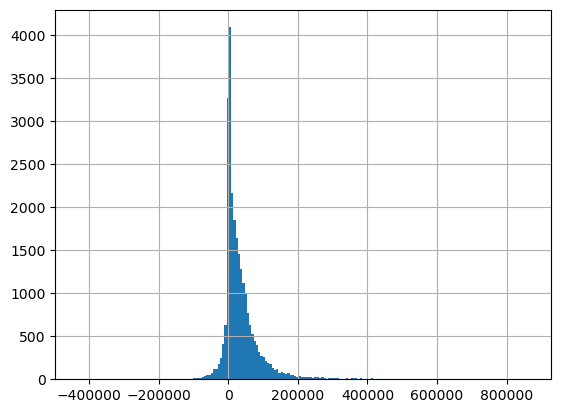

In [1208]:
data['LOSS'].hist(bins=200)

In [1209]:
# there are no rows where is ~ 0 LOSS
data[(data['LOSS']<1) & (data['LOSS']>-1)]

,index,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,...,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB,Period,PROPERTY_INSPECTION_WAIVER_INDICATOR,INT_COST,LOSS
10924,570,609255003639,122022,R,Other,3.875,3.875,53000.0,0.0,360,...,7.0,N,N,7,NaN,NaN,2013Q2,NaN,849.774922,0.714923
11633,283,318274377191,62016,C,"Wells Fargo Bank, N.A.",5.000,5.000,193000.0,0.0,360,...,NaN,N,N,NaN,NaN,NaN,2013Q3,NaN,5035.644766,-0.295234


In [1210]:
data['DISPOSITION_DATE'] = data['DISPOSITION_DATE'].astype('int64')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\3831720206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISPOSITION_DATE'] = data['DISPOSITION_DATE'].astype('int64')


In [1211]:
data['ORIG_DATE']

0         12011
1        112010
2         22011
3         12011
4         12011
          ...  
25549    102017
25550     82017
25551     82017
25552     82017
25553    112017
Name: ORIG_DATE, Length: 25521, dtype: object

# integrate the macroeconomic & state wise variables

In [1212]:
FHA30yr_data = pd.read_csv("./MacroEconomicToMerge/FHA30YearRate.csv")
FHA30yr_data.drop("DATE", axis = 1, inplace=True)

Unemployment_data = pd.read_csv("./MacroEconomicToMerge/UnemploymentRate.csv", index_col=0)

State_HPI = pd.read_csv("./MacroEconomicToMerge/State_HPI.csv", index_col=0)
State_HPI2 = pd.read_csv("./MacroEconomicToMerge/State_HPI.csv", index_col=0)

In [1213]:
State_HPI = State_HPI.rename(columns = {'DATE' : 'ORIG_DATE', 'HPI' : 'Orig_HPI', 'State' : 'STATE'})
State_HPI2 = State_HPI2.rename(columns = {'DATE' : 'DISPOSITION_DATE', 'HPI' : 'Disp_HPI', 'State' : 'STATE'})

In [1214]:
State_HPI2['DISPOSITION_DATE']

0         11975
1         41975
2         71975
3        101975
4         11976
          ...  
29095     62022
29096     92022
29097    122022
29098     32023
29099     62023
Name: DISPOSITION_DATE, Length: 29100, dtype: int64

In [1215]:
data = data.merge(State_HPI, on = ['ORIG_DATE', 'STATE'], how='left')
data = data.merge(State_HPI2, on = ['DISPOSITION_DATE', 'STATE'], how='left')

In [1216]:
data['Disp_HPI']

0        1153.48
1         317.10
2         421.33
3         289.67
4         315.27
          ...   
25516     381.30
25517     409.18
25518     354.88
25519     332.77
25520     503.65
Name: Disp_HPI, Length: 25521, dtype: float64

In [1217]:
data['MTM_LTV'] = data['LAST_UPB']/(data['ORIG_UPB']/data['OLTV']/data['Orig_HPI']*data['Disp_HPI'])

In [1218]:
data.dropna(subset=["MTM_LTV"], inplace=True)
data["MTM_LTV"] = data["MTM_LTV"].astype('float64')
#data['MTM_LTV'] = data['MTM_LTV'].astype('int')

In [1219]:
data = data.merge(FHA30yr_data, on = 'ZB_DTE', how='left')

Unemployment_data = Unemployment_data.rename({'DATE': 'ZB_DTE'}, axis = 1)
data = data.merge(Unemployment_data, on = 'ZB_DTE', how='left')


In [1220]:
from state_foreclosure import method_of_foreclosure_and_time

method_of_foreclosure_and_time = pd.DataFrame(method_of_foreclosure_and_time, columns=['STATE', 'method_of_foreclosurer', 'time_to_foreclose'] )

In [1221]:
data = data.merge(method_of_foreclosure_and_time, on = 'STATE', how='left')

Categorical column formatting

In [1222]:
# constrainting big column names
data.rename({'HIGH_BALANCE_LOAN_INDICATOR': 'HIGH_BAl',
             'method_of_foreclosurer' : 'method_fore',
             'FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT': 'principal_writeoff'
            }, axis=1, inplace=True)

In [1223]:
fdata = pd.get_dummies(data, columns=['PURPOSE', 'HIGH_BAl', 'method_fore'])


In [1224]:
fdata.drop('HIGH_BAl_N', axis= 1, inplace=True)
#fdata.rename({'HIGH_BALANCE_LOAN_INDICATOR_Y': 'HIGH_BAl'}, axis=1, inplace=True)

In [1225]:
fdata

,index,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,...,UNEmpRate,time_to_foreclose,PURPOSE_C,PURPOSE_P,PURPOSE_R,HIGH_BAl_Y,method_fore_Entry and Possession,method_fore_Judicial,method_fore_Power-of-Sale,method_fore_Strict Foreclosure
0,0,102211410611,42023,R,"Wells Fargo Bank, N.A.",4.250,4.250,150000.0,0.0,180,...,3.4,960,0,0,1,0,0,0,1,0
1,1,102788180928,22018,R,"Wells Fargo Bank, N.A.",5.750,5.750,73000.0,0.0,360,...,4.1,390,1,0,0,0,0,0,1,0
2,2,102792918958,72021,R,"JPMorgan Chase Bank, National Association",5.375,5.375,38000.0,0.0,360,...,5.4,390,0,1,0,0,0,0,1,0
3,3,102977852704,32013,C,Other,5.000,5.000,92000.0,0.0,360,...,7.5,540,1,0,0,0,0,0,1,0
4,4,103101496236,112015,R,Other,4.500,4.500,85000.0,0.0,180,...,5.1,570,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,662,995051434481,102021,R,Other,4.125,4.125,150000.0,0.0,360,...,4.5,510,0,1,0,0,0,1,0,0
24998,663,995555108801,32020,R,"Wells Fargo Bank, N.A.",4.625,4.625,100000.0,0.0,360,...,4.4,420,1,0,0,0,0,0,1,0
24999,664,995755646990,92020,R,Other,4.125,4.125,59000.0,0.0,360,...,7.9,630,0,1,0,0,0,1,0,0
25000,665,996967690678,52019,C,U.S. Bank N.A.,4.875,4.875,105000.0,0.0,360,...,3.7,540,0,1,0,0,0,1,0,0


numerical column filtering

In [1226]:
#there are many columns which have turned to be null columns after filtering.
print(fdata.shape)
current_size = fdata.shape[0]
all_null_columns = []

All_columns = fdata.columns
for column in All_columns:
    print(column, len(fdata[column].unique()))
    nulls = fdata[column].isnull().sum()
    if nulls==current_size:
        all_null_columns.append(column)
        
print("These are all the null columns--------------")
print(all_null_columns)

(25002, 77)
index 1650
LOAN_ID 25002
ACT_PERIOD 142
CHANNEL 3
SELLER 105
ORIG_RATE 297
CURR_RATE 293
ORIG_UPB 542
CURRENT_UPB 1
ORIG_TERM 28
ORIG_DATE 93
FIRST_PAY 93
OLTV 86
OCLTV 94
NUM_BO 4
DTI 54
CSCORE_B 231
CSCORE_C 212
FIRST_FLAG 3
PROP 5
NO_UNITS 4
OCC_STAT 3
STATE 50
MSA 385
ZIP 862
MI_PCT 13
PRODUCT 1
PPMT_FLG 1
IO 1
DLQ_STATUS 91
MOD_FLAG 3
Zero_Bal_Code 4
ZB_DTE 142
LAST_UPB 24952
TOT_SCHD_PRNCPL 28
LAST_PAID_INSTALLMENT_DATE 145
FORECLOSURE_DATE 143
DISPOSITION_DATE 141
FORECLOSURE_COSTS 22353
PROPERTY_PRESERVATION_AND_REPAIR_COSTS 13136
ASSET_RECOVERY_COSTS 2027
MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS 18990
ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY 18369
NET_SALES_PROCEEDS 21894
CREDIT_ENHANCEMENT_PROCEEDS 7533
REPURCHASES_MAKE_WHOLE_PROCEEDS 292
OTHER_FORECLOSURE_PROCEEDS 10793
NON_INTEREST_BEARING_UPB 393
PRINCIPAL_FORGIVENESS_AMOUNT 1
MI_TYPE 3
HOMEREADY_PROGRAM_INDICATOR 4
principal_writeoff 2
RELOCATION_MORTGAGE_INDICATOR 2
FORBEARANCE_INDICATOR 2
HIGH_LOAN_TO_VALUE_H

In [1227]:
fdata.drop(all_null_columns, axis=1, inplace = True)

In [1228]:
fdata.dtypes.loc["OLTV":]

OLTV                                 object
OCLTV                               float64
NUM_BO                              float64
DTI                                 float64
CSCORE_B                            float64
                                     ...   
HIGH_BAl_Y                            uint8
method_fore_Entry and Possession      uint8
method_fore_Judicial                  uint8
method_fore_Power-of-Sale             uint8
method_fore_Strict Foreclosure        uint8
Length: 65, dtype: object

In [1229]:
fdata['OLTV'] = fdata['OLTV'].astype('int')

In [1230]:
fdata.dropna(subset=["OCLTV"], inplace=True)
fdata['OCLTV'] = fdata['OCLTV'].astype('int')

In [1231]:
## raise issue for column variables 
col_types = fdata.dtypes
numerical_cols = list(col_types[col_types != 'object'].index)
non_num_cols =  list(col_types[col_types == 'object'].index)
print("These are the numerical columns--------\n", numerical_cols)

#these are written as numerical columns but are not.
phy_attributes = ['LOAN_ID', 'NUM_BO', 'ZIP', 'Zero_Bal_Code',
                  'MI_TYPE', 'HOMEREADY_PROGRAM_INDICATOR', 'FORBEARANCE_INDICATOR', 'ADR_COUNT']
dates_cols = ['ACT_PERIOD', 'ORIG_DATE', 'FIRST_PAY', 'ZB_DTE', 'FORECLOSURE_DATE' ]

These are the numerical columns--------
 ['index', 'ORIG_RATE', 'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C', 'ZIP', 'MI_PCT', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_UPB', 'TOT_SCHD_PRNCPL', 'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 'NON_INTEREST_BEARING_UPB', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'MI_TYPE', 'principal_writeoff', 'FORBEARANCE_INDICATOR', 'ADR_COUNT', 'ADR_UPB', 'INT_COST', 'LOSS', 'Orig_HPI', 'Disp_HPI', 'MTM_LTV', 'FHA_Mean', 'UNEmpRate', 'time_to_foreclose', 'PURPOSE_C', 'PURPOSE_P', 'PURPOSE_R', 'HIGH_BAl_Y', 'method_fore_Entry and Possession', 'method_fore_Judicial', 'method_fore_Power-of-Sale', 'method_fore_Strict Foreclosure']


In [1232]:
dependency_columns = ['INT_COST', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS' ,
     'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 
        'PRINCIPAL_FORGIVENESS_AMOUNT',  'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS']

working_columns = list(set(numerical_cols) - set(phy_attributes+dates_cols+dependency_columns))

In [1233]:
working_columns.append("Period")

In [1234]:
working_columns

['ORIG_UPB',
 'LAST_UPB',
 'HIGH_BAl_Y',
 'FHA_Mean',
 'method_fore_Entry and Possession',
 'ADR_UPB',
 'CURRENT_UPB',
 'Disp_HPI',
 'NON_INTEREST_BEARING_UPB',
 'OCLTV',
 'REPURCHASES_MAKE_WHOLE_PROCEEDS',
 'index',
 'method_fore_Power-of-Sale',
 'method_fore_Judicial',
 'CURR_RATE',
 'principal_writeoff',
 'CSCORE_C',
 'DISPOSITION_DATE',
 'MI_PCT',
 'MTM_LTV',
 'TOT_SCHD_PRNCPL',
 'method_fore_Strict Foreclosure',
 'PURPOSE_P',
 'Orig_HPI',
 'PURPOSE_R',
 'PURPOSE_C',
 'LOSS',
 'CSCORE_B',
 'OLTV',
 'time_to_foreclose',
 'ORIG_RATE',
 'UNEmpRate',
 'DTI',
 'Period']

In [1235]:
data.columns

Index(['index', 'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'ORIG_RATE',
       'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'ORIG_DATE',
       'FIRST_PAY', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C',
       'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT', 'STATE', 'MSA',
       'ZIP', 'MI_PCT', 'PRODUCT', 'PPMT_FLG', 'IO', 'DLQ_STATUS', 'MOD_FLAG',
       'Zero_Bal_Code', 'ZB_DTE', 'LAST_UPB', 'TOT_SCHD_PRNCPL',
       'LAST_PAID_INSTALLMENT_DATE', 'FORECLOSURE_DATE', 'DISPOSITION_DATE',
       'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
       'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
       'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 'NET_SALES_PROCEEDS',
       'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS',
       'OTHER_FORECLOSURE_PROCEEDS', 'NON_INTEREST_BEARING_UPB',
       'PRINCIPAL_FORGIVENESS_AMOUNT', 'MI_TYPE',
       'HOMEREADY_PROGRAM_INDICATOR', 'principal_writeoff',
       '

In [1236]:
wdata = fdata[working_columns]
wdata.isnull().sum(axis = 0)

ORIG_UPB                                0
LAST_UPB                                0
HIGH_BAl_Y                              0
FHA_Mean                                0
method_fore_Entry and Possession        0
ADR_UPB                             24836
CURRENT_UPB                             0
Disp_HPI                                0
NON_INTEREST_BEARING_UPB                0
OCLTV                                   0
REPURCHASES_MAKE_WHOLE_PROCEEDS      1954
index                                   0
method_fore_Power-of-Sale               0
method_fore_Judicial                    0
CURR_RATE                               0
principal_writeoff                  23483
CSCORE_C                            19294
DISPOSITION_DATE                        0
MI_PCT                              14323
MTM_LTV                                 0
TOT_SCHD_PRNCPL                     18551
method_fore_Strict Foreclosure          0
PURPOSE_P                               0
Orig_HPI                          

In [1237]:
#there are many columns which have turned to be null columns after filtering.
print(wdata.shape)
current_size = wdata.shape[0]
all_null_columns = []

All_columns = wdata.columns
for column in All_columns:
    print(column, len(wdata[column].unique()))
    nulls = wdata[column].isnull().sum()
    if nulls==current_size:
        all_null_columns.append(column)
all_null_columns

(25002, 34)
ORIG_UPB 542
LAST_UPB 24952
HIGH_BAl_Y 2
FHA_Mean 134
method_fore_Entry and Possession 2
ADR_UPB 167
CURRENT_UPB 1
Disp_HPI 1934
NON_INTEREST_BEARING_UPB 393
OCLTV 94
REPURCHASES_MAKE_WHOLE_PROCEEDS 292
index 1650
method_fore_Power-of-Sale 2
method_fore_Judicial 2
CURR_RATE 293
principal_writeoff 2
CSCORE_C 212
DISPOSITION_DATE 141
MI_PCT 13
MTM_LTV 25001
TOT_SCHD_PRNCPL 28
method_fore_Strict Foreclosure 2
PURPOSE_P 2
Orig_HPI 1378
PURPOSE_R 2
PURPOSE_C 2
LOSS 25002
CSCORE_B 231
OLTV 86
time_to_foreclose 22
ORIG_RATE 297
UNEmpRate 52
DTI 54
Period 28


[]

In [1238]:
#Model 2 - predict Loss Given default from the data
wdata['Lossper_GD'] = wdata['LOSS']/data['LAST_UPB']
wdata['Lossper_GD']

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\1064008143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata['Lossper_GD'] = wdata['LOSS']/data['LAST_UPB']


0        1.022750
1        0.039540
2        0.374687
3        0.888831
4        0.086300
           ...   
24997    1.076559
24998    1.035625
24999    0.218716
25000    0.228410
25001    0.012473
Name: Lossper_GD, Length: 25002, dtype: float64

In [1239]:
wdata.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\1410648804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata.replace([np.inf, -np.inf], np.nan, inplace=True)


In [1240]:
wdata.drop(all_null_columns, axis=1, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\4200858058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata.drop(all_null_columns, axis=1, inplace = True)


In [1241]:
wdata

,ORIG_UPB,LAST_UPB,HIGH_BAl_Y,FHA_Mean,method_fore_Entry and Possession,ADR_UPB,CURRENT_UPB,Disp_HPI,NON_INTEREST_BEARING_UPB,OCLTV,...,PURPOSE_C,LOSS,CSCORE_B,OLTV,time_to_foreclose,ORIG_RATE,UNEmpRate,DTI,Period,Lossper_GD
0,150000.0,1306.25,0,6.3425,0,NaN,0.0,1153.48,0.00,79,...,0,1335.967187,786.0,79,960,4.250,3.4,28.0,2011Q1,1.022750
1,73000.0,65851.32,0,4.3300,0,NaN,0.0,317.10,0.00,80,...,1,2603.749400,820.0,80,390,5.750,4.1,22.0,2011Q1,0.039540
2,38000.0,38271.03,0,2.8680,0,NaN,0.0,421.33,0.00,80,...,0,14339.649381,693.0,80,390,5.375,5.4,48.0,2011Q1,0.374687
3,92000.0,90409.72,0,3.5650,0,NaN,0.0,289.67,0.00,80,...,1,80358.995635,783.0,80,540,5.000,7.5,29.0,2011Q1,0.888831
4,85000.0,65226.36,0,3.9425,0,NaN,0.0,315.27,0.00,73,...,1,5629.062375,800.0,73,570,4.500,5.1,30.0,2011Q1,0.086300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,150000.0,151906.23,0,3.0675,0,NaN,0.0,381.30,14985.22,97,...,0,163535.958287,711.0,97,510,4.125,4.5,47.0,2017Q4,1.076559
24998,100000.0,97329.06,0,3.4500,0,NaN,0.0,409.18,0.00,65,...,1,100796.407762,710.0,65,420,4.625,4.4,36.0,2017Q4,1.035625
24999,59000.0,56396.83,0,2.8900,0,NaN,0.0,354.88,0.00,95,...,0,12334.880443,800.0,95,630,4.125,7.9,32.0,2017Q4,0.218716
25000,105000.0,104760.00,0,4.0720,0,NaN,0.0,332.77,0.00,100,...,0,23928.235000,646.0,97,540,4.875,3.7,45.0,2017Q4,0.228410


In [1242]:
wdata.dropna(subset=["Lossper_GD", "CSCORE_B", "DTI" , "OCLTV"], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12524\3545764112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata.dropna(subset=["Lossper_GD", "CSCORE_B", "DTI" , "OCLTV"], inplace=True)


In [1243]:
wdata.isnull().sum(axis = 0)

ORIG_UPB                                0
LAST_UPB                                0
HIGH_BAl_Y                              0
FHA_Mean                                0
method_fore_Entry and Possession        0
ADR_UPB                             24789
CURRENT_UPB                             0
Disp_HPI                                0
NON_INTEREST_BEARING_UPB                0
OCLTV                                   0
REPURCHASES_MAKE_WHOLE_PROCEEDS      1951
index                                   0
method_fore_Power-of-Sale               0
method_fore_Judicial                    0
CURR_RATE                               0
principal_writeoff                  23439
CSCORE_C                            19254
DISPOSITION_DATE                        0
MI_PCT                              14287
MTM_LTV                                 0
TOT_SCHD_PRNCPL                     18514
method_fore_Strict Foreclosure          0
PURPOSE_P                               0
Orig_HPI                          

Linear Models


In [1244]:
wdata

,ORIG_UPB,LAST_UPB,HIGH_BAl_Y,FHA_Mean,method_fore_Entry and Possession,ADR_UPB,CURRENT_UPB,Disp_HPI,NON_INTEREST_BEARING_UPB,OCLTV,...,PURPOSE_C,LOSS,CSCORE_B,OLTV,time_to_foreclose,ORIG_RATE,UNEmpRate,DTI,Period,Lossper_GD
0,150000.0,1306.25,0,6.3425,0,NaN,0.0,1153.48,0.00,79,...,0,1335.967187,786.0,79,960,4.250,3.4,28.0,2011Q1,1.022750
1,73000.0,65851.32,0,4.3300,0,NaN,0.0,317.10,0.00,80,...,1,2603.749400,820.0,80,390,5.750,4.1,22.0,2011Q1,0.039540
2,38000.0,38271.03,0,2.8680,0,NaN,0.0,421.33,0.00,80,...,0,14339.649381,693.0,80,390,5.375,5.4,48.0,2011Q1,0.374687
3,92000.0,90409.72,0,3.5650,0,NaN,0.0,289.67,0.00,80,...,1,80358.995635,783.0,80,540,5.000,7.5,29.0,2011Q1,0.888831
4,85000.0,65226.36,0,3.9425,0,NaN,0.0,315.27,0.00,73,...,1,5629.062375,800.0,73,570,4.500,5.1,30.0,2011Q1,0.086300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,150000.0,151906.23,0,3.0675,0,NaN,0.0,381.30,14985.22,97,...,0,163535.958287,711.0,97,510,4.125,4.5,47.0,2017Q4,1.076559
24998,100000.0,97329.06,0,3.4500,0,NaN,0.0,409.18,0.00,65,...,1,100796.407762,710.0,65,420,4.625,4.4,36.0,2017Q4,1.035625
24999,59000.0,56396.83,0,2.8900,0,NaN,0.0,354.88,0.00,95,...,0,12334.880443,800.0,95,630,4.125,7.9,32.0,2017Q4,0.218716
25000,105000.0,104760.00,0,4.0720,0,NaN,0.0,332.77,0.00,100,...,0,23928.235000,646.0,97,540,4.875,3.7,45.0,2017Q4,0.228410


In [1245]:
#wdata.fillna(0, inplace=True)

In [1246]:
wdata.isnull().sum(axis = 0)

ORIG_UPB                                0
LAST_UPB                                0
HIGH_BAl_Y                              0
FHA_Mean                                0
method_fore_Entry and Possession        0
ADR_UPB                             24789
CURRENT_UPB                             0
Disp_HPI                                0
NON_INTEREST_BEARING_UPB                0
OCLTV                                   0
REPURCHASES_MAKE_WHOLE_PROCEEDS      1951
index                                   0
method_fore_Power-of-Sale               0
method_fore_Judicial                    0
CURR_RATE                               0
principal_writeoff                  23439
CSCORE_C                            19254
DISPOSITION_DATE                        0
MI_PCT                              14287
MTM_LTV                                 0
TOT_SCHD_PRNCPL                     18514
method_fore_Strict Foreclosure          0
PURPOSE_P                               0
Orig_HPI                          

In [1247]:
import statsmodels.api as sm

In [1248]:
# split into testing-traning set if not done already

# import dataset here

In [1309]:
wdata = pd.read_csv("CleanData.csv", index_col=0)

In [1310]:
wdata

,ACT_PERIOD,CHANNEL,ORIG_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,OLTV,OCLTV,NUM_BO,DTI,...,Disp_HPI,MTM_LTV,time_to_foreclose,PURPOSE_P,PURPOSE_R,PURPOSE_U,method_fore_Judicial,method_fore_Power-of-Sale,method_fore_Strict Foreclosure,Lossper_GD
0,122011,C,6.500,72000.0,0.0,360,60,60.0,2.0,17.0,...,299.38,46.585631,630.0,0,1,0,1,0,0,49.133644
1,12014,C,5.875,104000.0,0.0,360,90,90.0,2.0,33.0,...,245.84,57.555854,540.0,0,0,0,1,0,0,-0.460592
2,22011,C,5.500,90000.0,0.0,360,75,75.0,1.0,30.0,...,225.61,84.417459,390.0,0,0,0,0,1,0,86.868331
3,122010,C,6.125,124000.0,0.0,360,97,97.0,1.0,23.0,...,341.96,62.443259,450.0,1,0,0,0,1,0,5.545693
4,32014,R,6.125,45000.0,0.0,240,67,67.0,1.0,39.0,...,243.44,46.494219,510.0,0,1,0,1,0,0,27.050763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502615,42010,C,7.000,96000.0,0.0,360,80,80.0,1.0,50.0,...,445.70,92.150509,900.0,0,1,0,1,0,0,79.430709
502616,72013,R,6.250,116000.0,0.0,360,80,80.0,2.0,62.0,...,303.16,87.742573,810.0,1,0,0,1,0,0,30.368855
502617,42014,C,6.625,112000.0,0.0,360,70,70.0,1.0,37.0,...,278.57,71.963301,420.0,0,1,0,0,1,0,97.038371
502618,22012,B,6.750,153000.0,0.0,360,90,90.0,1.0,58.0,...,399.33,98.159220,480.0,1,0,0,0,1,0,48.302708


In [1311]:
wdata.isnull().sum(axis = 0)

ACT_PERIOD                                            0
CHANNEL                                               0
ORIG_RATE                                             0
ORIG_UPB                                              0
CURRENT_UPB                                           0
ORIG_TERM                                             0
OLTV                                                  0
OCLTV                                                 0
NUM_BO                                                0
DTI                                                   0
CSCORE_B                                              0
FIRST_FLAG                                            0
PROP                                                  0
NO_UNITS                                              0
OCC_STAT                                              0
MSA                                                   0
ZIP                                                   0
PRODUCT                                         

In [1249]:
# important before starting regression
#wdata.fillna(0, inplace=True)

In [1312]:
wdata['Lossper_GD'].describe()

count    475757.000000
mean         50.675071
std          41.240409
min       -4074.605969
25%          24.424599
50%          47.669065
75%          72.408220
max        5613.912120
Name: Lossper_GD, dtype: float64

<Axes: >

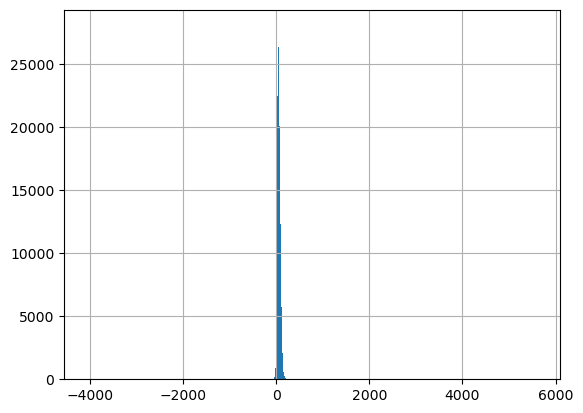

In [1313]:
wdata['Lossper_GD'].hist(bins=2000)

In [1314]:
wdata_filt = wdata[(wdata['Lossper_GD'] < 200) & (wdata['Lossper_GD'] > -30)]


<Axes: >

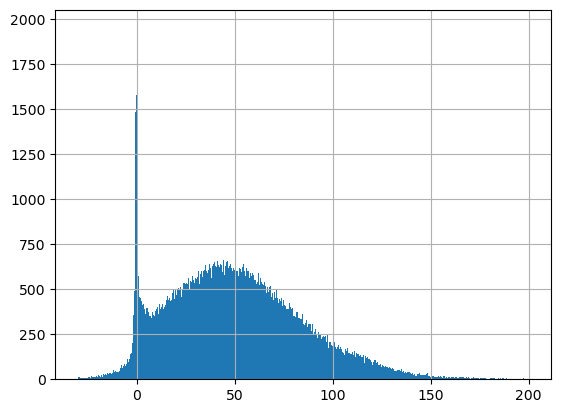

In [1315]:
wdata_filt['Lossper_GD'].hist(bins=2000)

In [1316]:
wdata = wdata_filt

In [1333]:
wdata['RE_PROCS_FLAG']

0         N
1         N
2         N
3         N
4         N
         ..
502615    N
502616    N
502617    N
502618    N
502619    Y
Name: RE_PROCS_FLAG, Length: 473875, dtype: object

In [1325]:
wdata.dtypes

ACT_PERIOD                                              int64
CHANNEL                                                object
ORIG_RATE                                             float64
ORIG_UPB                                              float64
CURRENT_UPB                                           float64
ORIG_TERM                                               int64
OLTV                                                    int64
OCLTV                                                 float64
NUM_BO                                                float64
DTI                                                   float64
CSCORE_B                                              float64
FIRST_FLAG                                             object
PROP                                                   object
NO_UNITS                                                int64
OCC_STAT                                               object
MSA                                                     int64
ZIP     

In [1330]:
col_types = wdata.dtypes

In [1334]:
NumerCol = list(col_types[col_types != 'object'].index)

# Stratified Sampling

In [1317]:
wdata.groupby(['Period'])['Period'].count()

Period
2003Q1    16372
2003Q2    22499
2003Q3    26270
2003Q4    16608
2004Q1    11364
2004Q2    14715
2004Q3    11079
2004Q4    12834
2005Q1    11564
2005Q2    16212
2005Q3    24637
2005Q4    24139
2006Q1    18159
2006Q2    21926
2006Q3    20418
2006Q4    22738
2007Q1    20681
2007Q2    23588
2007Q3    25115
2007Q4    36845
2008Q1    26801
2008Q2    22689
2008Q3    16108
2008Q4    10514
Name: Period, dtype: int64

Y = wdata['LOSS']
X = wdata.drop("LOSS", axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [1318]:
strat_data = wdata.groupby('Period', group_keys=False).apply(lambda x: x.sample(min(len(x),
                                    min(np.unique(wdata['Period'], return_counts=True)[1]))).sample(frac=1))

In [1319]:
strat_data

,ACT_PERIOD,CHANNEL,ORIG_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,OLTV,OCLTV,NUM_BO,DTI,...,Disp_HPI,MTM_LTV,time_to_foreclose,PURPOSE_P,PURPOSE_R,PURPOSE_U,method_fore_Judicial,method_fore_Power-of-Sale,method_fore_Strict Foreclosure,Lossper_GD
2516,32010,R,6.375,141000.0,0.0,360,95,95.0,1.0,38.0,...,239.18,105.190443,390.0,1,0,0,0,1,0,64.842115
3147,22006,B,5.750,140000.0,0.0,360,80,80.0,2.0,54.0,...,360.23,68.182424,450.0,0,0,0,0,1,0,64.186642
17018,122013,C,5.500,95000.0,0.0,180,57,57.0,2.0,35.0,...,461.55,28.784086,1320.0,0,1,0,0,0,0,-28.230240
6397,82010,C,6.375,203000.0,0.0,360,80,80.0,2.0,48.0,...,234.14,78.919969,510.0,0,0,0,1,0,0,103.320186
13306,92011,C,5.750,60000.0,0.0,240,75,75.0,2.0,49.0,...,242.62,55.128522,540.0,0,0,0,1,0,0,83.365740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493316,62010,R,6.125,395000.0,0.0,360,74,74.0,1.0,35.0,...,414.77,83.342025,630.0,1,0,0,0,1,0,34.845700
502251,72013,B,7.375,137000.0,0.0,360,75,75.0,1.0,33.0,...,303.16,84.631464,810.0,1,0,0,1,0,0,97.413063
494822,42014,R,5.750,92000.0,0.0,360,80,80.0,1.0,63.0,...,328.52,85.387615,810.0,1,0,0,1,0,0,72.903874
492780,112010,R,6.125,276000.0,0.0,360,80,80.0,1.0,48.0,...,317.22,84.337003,570.0,0,0,0,1,0,0,38.243207


In [1320]:
strat_data.groupby(['Period'])['Period'].count()

Period
2003Q1    10514
2003Q2    10514
2003Q3    10514
2003Q4    10514
2004Q1    10514
2004Q2    10514
2004Q3    10514
2004Q4    10514
2005Q1    10514
2005Q2    10514
2005Q3    10514
2005Q4    10514
2006Q1    10514
2006Q2    10514
2006Q3    10514
2006Q4    10514
2007Q1    10514
2007Q2    10514
2007Q3    10514
2007Q4    10514
2008Q1    10514
2008Q2    10514
2008Q3    10514
2008Q4    10514
Name: Period, dtype: int64

# Train Test Split

In [1321]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(strat_data, test_size=0.2)

results.summary

results.predict()

In [1259]:
#wdata.to_csv('TidyData.csv')

In [1322]:
train['Lossper_GD'].describe()

count    201868.000000
mean         50.021180
std          35.161142
min         -29.942664
25%          23.404909
50%          46.942432
75%          72.214169
max         199.940067
Name: Lossper_GD, dtype: float64

(array([  45.,   45.,   52.,   43.,   55.,   46.,   68.,   62.,   69.,
          75.,   86.,  112.,  117.,  142.,  154.,  156.,  170.,  206.,
         231.,  296.,  345.,  374.,  477.,  611., 1220., 5301., 3855.,
        2111., 1782., 1719., 1747., 1683., 1639., 1657., 1676., 1702.,
        1710., 1779., 1768., 1936., 1936., 1951., 2008., 2067., 2116.,
        2194., 2212., 2221., 2263., 2327., 2262., 2276., 2365., 2384.,
        2476., 2492., 2547., 2463., 2587., 2564., 2593., 2605., 2573.,
        2539., 2641., 2618., 2618., 2551., 2421., 2591., 2565., 2542.,
        2518., 2505., 2379., 2433., 2423., 2304., 2351., 2297., 2253.,
        2227., 2170., 2095., 1998., 2090., 1920., 1886., 1870., 1800.,
        1780., 1745., 1649., 1687., 1569., 1566., 1512., 1455., 1445.,
        1484., 1325., 1259., 1250., 1276., 1120., 1122., 1093., 1013.,
        1023.,  932.,  952.,  898.,  855.,  849.,  771.,  732.,  749.,
         753.,  661.,  723.,  711.,  684.,  622.,  631.,  564.,  564.,
      

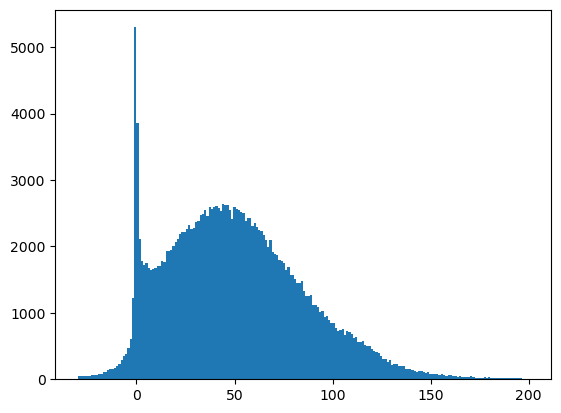

In [1324]:
plt.hist(train['Lossper_GD'], bins = 200)

In [1347]:
Y = train['Lossper_GD']
X = train[NumerCol].drop(["Lossper_GD","LOSS","NO_UNITS", "HOMEREADY_PROGRAM_INDICATOR", 'ACT_PERIOD', 'ZIP',
                         'ORIG_DATE_m',
 'ORIG_DATE_y',
 'LAST_PAID_INSTALLMENT_DATE_m',
 'LAST_PAID_INSTALLMENT_DATE_y',
 'FORECLOSURE_DATE_m',
 'FORECLOSURE_DATE_y',
 'DISPOSITION_DATE_m',
 'DISPOSITION_DATE_y',
 'FIRST_PAY_m',
 'FIRST_PAY_y',
 'ZB_DTE_m',
 'ZB_DTE_y',], axis=1)
#X = sm.add_constant(X)
#model2 = sm.OLS(Y,X)
#results2 = model2.fit()

In [1342]:
train['HOMEREADY_PROGRAM_INDICATOR']

493817    7
489045    7
54179     7
208801    7
242114    7
         ..
483970    7
179583    7
43081     7
461146    7
486592    7
Name: HOMEREADY_PROGRAM_INDICATOR, Length: 201868, dtype: int64

In [1337]:
#results2.summary()
NumerCol

['ACT_PERIOD',
 'ORIG_RATE',
 'ORIG_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'NO_UNITS',
 'MSA',
 'ZIP',
 'LAST_UPB',
 'NON_INTEREST_BEARING_UPB',
 'HOMEREADY_PROGRAM_INDICATOR',
 'ORIG_DATE_m',
 'ORIG_DATE_y',
 'LAST_PAID_INSTALLMENT_DATE_m',
 'LAST_PAID_INSTALLMENT_DATE_y',
 'FORECLOSURE_DATE_m',
 'FORECLOSURE_DATE_y',
 'DISPOSITION_DATE_m',
 'DISPOSITION_DATE_y',
 'FIRST_PAY_m',
 'FIRST_PAY_y',
 'ZB_DTE_m',
 'ZB_DTE_y',
 'ACCRUED_INT',
 'LOSS',
 'FHA_Mean',
 'UNEmpRate',
 'Orig_HPI',
 'Disp_HPI',
 'MTM_LTV',
 'time_to_foreclose',
 'PURPOSE_P',
 'PURPOSE_R',
 'PURPOSE_U',
 'method_fore_Judicial',
 'method_fore_Power-of-Sale',
 'method_fore_Strict Foreclosure',
 'Lossper_GD']

In [1349]:
X.columns

Index(['ORIG_RATE', 'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'OLTV', 'OCLTV',
       'NUM_BO', 'DTI', 'CSCORE_B', 'MSA', 'LAST_UPB',
       'NON_INTEREST_BEARING_UPB', 'ACCRUED_INT', 'FHA_Mean', 'UNEmpRate',
       'Orig_HPI', 'Disp_HPI', 'MTM_LTV', 'time_to_foreclose', 'PURPOSE_P',
       'PURPOSE_R', 'PURPOSE_U', 'method_fore_Judicial',
       'method_fore_Power-of-Sale', 'method_fore_Strict Foreclosure'],
      dtype='object')

# Further steps
1.
2. Try to fill na CSCORE_C(later)

Question--

Are we looking for strong associates of Loss variable?

In [1264]:
#GAM model with smoothing splines
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines


In [1350]:
X.isnull().sum(axis = 0)

ORIG_RATE                         0
ORIG_UPB                          0
CURRENT_UPB                       0
ORIG_TERM                         0
OLTV                              0
OCLTV                             0
NUM_BO                            0
DTI                               0
CSCORE_B                          0
MSA                               0
LAST_UPB                          0
NON_INTEREST_BEARING_UPB          0
ACCRUED_INT                       0
FHA_Mean                          0
UNEmpRate                         0
Orig_HPI                          0
Disp_HPI                          0
MTM_LTV                           0
time_to_foreclose                 0
PURPOSE_P                         0
PURPOSE_R                         0
PURPOSE_U                         0
method_fore_Judicial              0
method_fore_Power-of-Sale         0
method_fore_Strict Foreclosure    0
dtype: int64

x_spline = wdata[['OLTV', 'OCLTV']] 
bs = BSplines(x_spline, df=[12, 10], degree=[3, 3])

gam_bs = GLMGam.from_formula('Lossper_GD ~ ', data=wdata,
                              smoother=bs)
 

res_bs = gam_bs.fit()



print(res_bs.summary())

wdata.columns

# Forward Selection

In [1351]:
X

,ORIG_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,MSA,...,Orig_HPI,Disp_HPI,MTM_LTV,time_to_foreclose,PURPOSE_P,PURPOSE_R,PURPOSE_U,method_fore_Judicial,method_fore_Power-of-Sale,method_fore_Strict Foreclosure
493817,6.000,288000.0,0.0,360,90,90.0,1.0,27.0,757.0,29820,...,284.38,186.35,134.776210,930.0,1,0,0,0,1,0
489045,5.500,277000.0,0.0,360,90,90.0,1.0,45.0,716.0,35620,...,544.20,473.00,97.584302,1530.0,0,1,0,1,0,0
54179,5.625,70000.0,0.0,360,80,80.0,1.0,29.0,639.0,0,...,265.29,328.75,60.493816,420.0,0,1,0,0,1,0
208801,6.000,321000.0,0.0,360,90,90.0,2.0,60.0,651.0,29820,...,394.58,236.82,144.358686,930.0,1,0,0,0,1,0
242114,5.875,354000.0,0.0,360,77,77.0,1.0,60.0,680.0,31080,...,625.58,408.40,113.505377,480.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483970,6.375,96000.0,0.0,240,80,80.0,1.0,48.0,658.0,34980,...,302.95,280.40,81.412032,420.0,0,0,0,0,1,0
179583,6.000,189000.0,0.0,360,70,70.0,2.0,30.0,647.0,47900,...,475.55,461.79,63.204476,660.0,0,0,0,0,1,0
43081,5.750,68000.0,0.0,360,85,85.0,1.0,39.0,778.0,34740,...,296.48,291.49,81.210845,390.0,0,1,0,0,1,0
461146,6.500,44000.0,0.0,180,71,71.0,2.0,44.0,796.0,38300,...,399.11,397.11,46.992634,690.0,0,0,0,1,0,0


In [1363]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=12,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [1364]:
sfs.fit(X, Y)
sfs.k_feature_names_

('ORIG_RATE',
 'ORIG_UPB',
 'ORIG_TERM',
 'OLTV',
 'MSA',
 'ACCRUED_INT',
 'UNEmpRate',
 'Orig_HPI',
 'Disp_HPI',
 'MTM_LTV',
 'PURPOSE_P',
 'method_fore_Power-of-Sale')

In [1365]:
feat_cols = list(sfs.k_feature_idx_)

In [1366]:
feat_cols

[0, 1, 3, 4, 9, 12, 14, 15, 16, 17, 19, 23]

In [1373]:
X.iloc[:,feat_cols]

,ORIG_RATE,ORIG_UPB,ORIG_TERM,OLTV,MSA,ACCRUED_INT,UNEmpRate,Orig_HPI,Disp_HPI,MTM_LTV,PURPOSE_P,method_fore_Power-of-Sale
493817,6.000,288000.0,360,90,29820,33266.014677,8.2,284.38,186.35,134.776210,1,1
489045,5.500,277000.0,360,90,35620,41452.194599,5.4,544.20,473.00,97.584302,0,0
54179,5.625,70000.0,360,80,0,3460.081918,4.5,265.29,328.75,60.493816,0,1
208801,6.000,321000.0,360,90,29820,23279.622680,9.6,394.58,236.82,144.358686,1,1
242114,5.875,354000.0,360,77,31080,28232.893650,10.0,625.58,408.40,113.505377,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
483970,6.375,96000.0,240,80,34980,10895.920890,8.2,302.95,280.40,81.412032,0,1
179583,6.000,189000.0,360,70,47900,30429.284665,5.1,475.55,461.79,63.204476,0,1
43081,5.750,68000.0,360,85,34740,5173.891200,4.4,296.48,291.49,81.210845,0,1
461146,6.500,44000.0,180,71,38300,3712.583312,5.0,399.11,397.11,46.992634,0,0


In [1357]:
sfs1 = SFS(LinearRegression(),
         k_features=(1,25),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, Y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(),
                          k_features=(1, 25), scoring='r2')

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


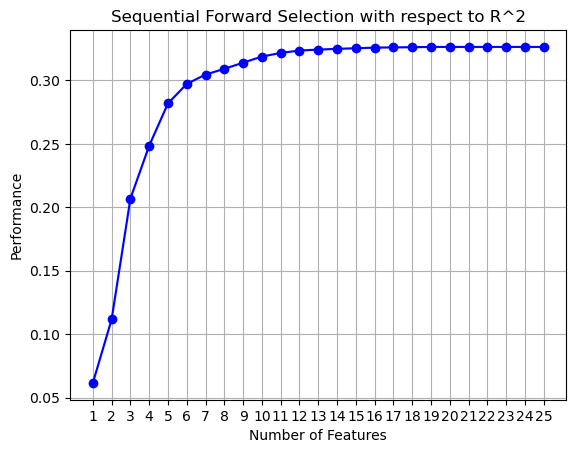

In [1368]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection with respect to R^2')
plt.grid()
plt.show()

In [1369]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.06157803]),
  'avg_score': 0.061578031005413925,
  'feature_names': ('ORIG_RATE',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.11167114]),
  'avg_score': 0.11167113873023282,
  'feature_names': ('ORIG_RATE', 'ORIG_UPB'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 1, 12),
  'cv_scores': array([0.20691115]),
  'avg_score': 0.20691115176062436,
  'feature_names': ('ORIG_RATE', 'ORIG_UPB', 'ACCRUED_INT'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 1, 12, 17),
  'cv_scores': array([0.24864631]),
  'avg_score': 0.24864630832115553,
  'feature_names': ('ORIG_RATE', 'ORIG_UPB', 'ACCRUED_INT', 'MTM_LTV'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 1, 4, 12, 17),
  'cv_scores': array([0.28201118]),
  'avg_score': 0.2820111793519209,
  'feature_names': ('ORIG_RATE', 'ORIG_UP

In [1370]:
X_train = X.iloc[:,feat_cols]

In [1371]:
X_train = sm.add_constant(X_train)
fs_model = sm.OLS(Y,X_train)
fs_results = fs_model.fit()

In [1372]:
fs_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Lossper_GD   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     8049.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:02:32   Log-Likelihood:            -9.6561e+05
No. Observations:              201868   AIC:                         1.931e+06
Df Residuals:                  201855   BIC:                         1.931e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        19.7570      1.069     18.479      0.000      17.661      21.853
ORIG_RATE                     8.1025      0.132     61.282      0.000       7.843       8.362
ORIG_UPB                     -0.0002   9.87e-07   -213.007      0.000      -0.000      -0.000
ORIG_TERM                    -0.0365      0.002    -23.849      0.000      -0.039      -0.033
OLTV                         -0.1574      0.009    -17.148      0.000      -0.175      -0.139
MSA                          -0.0001   4.96e-06    -28.963      0.000      -0.000      -0.000
ACCRUED_INT                   0.0006   3.87e-06    166.993      0.000       0.001       0.001
UNEmpRate                     1.3743      0.041     33.198      0.000       1.293       1.455
Orig_HPI                      0.0768      0.002     46.286      0.000       0.074       0.080
Disp_HPI                     -0.0534      0.002    -31.200      0.000      -0.057      -0.050
MTM_LTV                       0.2213      0.007     32.863      0.000       0.208       0.235
PURPOSE_P                    -9.9739      0.152    -65.825      0.000     -10.271      -9.677
method_fore_Power-of-Sale    -7.3552      0.139    -52.908      0.000      -7.628      -7.083
==============================================================================
Omnibus:                     9931.650   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14129.400
Skew:                           0.462   Prob(JB):                         0.00
Kurtosis:                       3.909   Cond. No.                     3.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


# Diagnostic

## Residual vs Fitted plot

In [1278]:
#model_fitted_y = fs_results.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='Lossper_GD', data=wdata, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

## Normality

pred_val = fs_results.fittedvalues.copy()
true_val = wdata['Lossper_GD'].values.copy()
residual = true_val - pred_val

import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)

# Testing

In [1377]:
X_test = test.loc[:,sfs.k_feature_names_]

In [1381]:
X_test

,const,ORIG_RATE,ORIG_UPB,ORIG_TERM,OLTV,MSA,ACCRUED_INT,UNEmpRate,Orig_HPI,Disp_HPI,MTM_LTV,PURPOSE_P,method_fore_Power-of-Sale
449344,1.0,6.375,360000.0,360,63,47900,141781.854450,4.9,614.19,785.85,48.278747,0,0
483340,1.0,5.250,200000.0,360,62,12100,24917.280080,6.1,544.20,478.28,65.224367,0,0
129061,1.0,5.875,240000.0,360,80,19820,4017.088454,9.0,312.43,229.44,99.006272,0,1
96871,1.0,6.250,76000.0,360,95,26900,7324.254100,4.5,235.42,255.91,85.650273,1,0
143231,1.0,6.000,40000.0,240,78,0,4062.191094,9.1,242.77,238.49,68.503474,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64968,1.0,4.875,323000.0,360,79,35620,27861.596522,8.2,466.96,554.39,58.544240,1,0
378724,1.0,6.375,299000.0,360,95,38060,42263.295471,8.3,420.14,238.63,162.371933,1,1
116295,1.0,6.675,298000.0,360,95,47260,28009.071081,9.5,357.55,393.05,81.107711,1,1
164098,1.0,5.875,135000.0,360,76,22660,20352.835235,9.6,341.83,338.80,73.848480,1,1


In [1279]:
#X_test = pd.read_csv("X_test.csv")

In [1280]:
#X_test = X_test.iloc[:,1:]

In [1378]:
X_test = sm.add_constant(X_test)

In [1382]:
LGD_predict = fs_results.predict(X_test)

In [1383]:
LGD_predict

449344    80.012039
483340    50.791407
129061    29.597041
96871     46.783758
143231    75.132485
            ...    
64968     -0.831044
378724    51.846780
116295    14.555432
164098    44.146324
136218    33.210565
Length: 50468, dtype: float64

In [1387]:
TabData = test.loc[:,sfs.k_feature_names_]

In [1391]:
TabData['Actual_LGD'] = test['Lossper_GD']

In [1396]:
TabData['Predicted_LGD'] = LGD_predict

In [1397]:
TabData

,ORIG_RATE,ORIG_UPB,ORIG_TERM,OLTV,MSA,ACCRUED_INT,UNEmpRate,Orig_HPI,Disp_HPI,MTM_LTV,PURPOSE_P,method_fore_Power-of-Sale,Actual_LGD,Predicted_LGD
449344,6.375,360000.0,360,63,47900,141781.854450,4.9,614.19,785.85,48.278747,0,0,38.586718,80.012039
483340,5.250,200000.0,360,62,12100,24917.280080,6.1,544.20,478.28,65.224367,0,0,73.360884,50.791407
129061,5.875,240000.0,360,80,19820,4017.088454,9.0,312.43,229.44,99.006272,0,1,26.598358,29.597041
96871,6.250,76000.0,360,95,26900,7324.254100,4.5,235.42,255.91,85.650273,1,0,79.040623,46.783758
143231,6.000,40000.0,240,78,0,4062.191094,9.1,242.77,238.49,68.503474,0,0,86.001510,75.132485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64968,4.875,323000.0,360,79,35620,27861.596522,8.2,466.96,554.39,58.544240,1,0,45.857762,-0.831044
378724,6.375,299000.0,360,95,38060,42263.295471,8.3,420.14,238.63,162.371933,1,1,30.299839,51.846780
116295,6.675,298000.0,360,95,47260,28009.071081,9.5,357.55,393.05,81.107711,1,1,1.689135,14.555432
164098,5.875,135000.0,360,76,22660,20352.835235,9.6,341.83,338.80,73.848480,1,1,82.734275,44.146324


In [1398]:
TabData.to_csv('../TabData.csv')

In [1289]:
#x = np.linspace(0, 2605, 2606)
#plt.plot(x, Y_test)
#plt.plot(x, Y_predict)  
#plt.show()

In [1290]:
#X_test['LGD_Actual'] = Y_test
#X_test['LGD_Predict'] = Y_predict

In [1291]:
#X_test

# Blocks

In [1399]:
TabData['MTM_LTV'].sort_values()

43588       0.056435
69279       0.087846
340186      0.186602
79677       0.246394
56677       0.249453
             ...    
330839    196.325848
237420    199.571663
256120    199.583816
285767    203.858594
353219    217.510730
Name: MTM_LTV, Length: 50468, dtype: float64

In [1400]:
labels = TabData[['MTM_LTV']].apply(lambda x: pd.cut(x, np.linspace(0, 220, int(220/10+1)).tolist()
                                                     , labels = np.linspace(10, 220, int(220/10)).tolist()))

In [1401]:
TabData = pd.concat([TabData, labels.add_prefix('label_')], axis = 1)

In [1402]:
TabData

,ORIG_RATE,ORIG_UPB,ORIG_TERM,OLTV,MSA,ACCRUED_INT,UNEmpRate,Orig_HPI,Disp_HPI,MTM_LTV,PURPOSE_P,method_fore_Power-of-Sale,Actual_LGD,Predicted_LGD,label_MTM_LTV
449344,6.375,360000.0,360,63,47900,141781.854450,4.9,614.19,785.85,48.278747,0,0,38.586718,80.012039,50.0
483340,5.250,200000.0,360,62,12100,24917.280080,6.1,544.20,478.28,65.224367,0,0,73.360884,50.791407,70.0
129061,5.875,240000.0,360,80,19820,4017.088454,9.0,312.43,229.44,99.006272,0,1,26.598358,29.597041,100.0
96871,6.250,76000.0,360,95,26900,7324.254100,4.5,235.42,255.91,85.650273,1,0,79.040623,46.783758,90.0
143231,6.000,40000.0,240,78,0,4062.191094,9.1,242.77,238.49,68.503474,0,0,86.001510,75.132485,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64968,4.875,323000.0,360,79,35620,27861.596522,8.2,466.96,554.39,58.544240,1,0,45.857762,-0.831044,60.0
378724,6.375,299000.0,360,95,38060,42263.295471,8.3,420.14,238.63,162.371933,1,1,30.299839,51.846780,170.0
116295,6.675,298000.0,360,95,47260,28009.071081,9.5,357.55,393.05,81.107711,1,1,1.689135,14.555432,90.0
164098,5.875,135000.0,360,76,22660,20352.835235,9.6,341.83,338.80,73.848480,1,1,82.734275,44.146324,80.0


In [1405]:
TabData.to_csv('../TabData2.csv')